<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Acceso a Bases de Datos con SQL Magic</font></h1>


#### Al finalizar el estudio de este cuaderno, sabrás acceder a bases de datos con el uso de SQL “Magic”. Te conectaras a una base de datos Bb2, ejecutaras comandos en SQL para crear tablas, introducirás datos y hacer consultas, además de guardar lo resultados en un dataframe de Python.


#### Para comunicarse con bases de datos SQL desde un cuaderno de JupyterLab, podemos usar SQL Magic, que es implementado por la extensión ipython-sql Magic es un término usado en JupyterLab para referirse a comandos especiales que empiezan por %.  Dentro del entorno del laboratorio proveído por el curso, la extensión ipython-sql ya se encuentra instalada así como el controlador ibm_db_sa.


In [1]:
#!pip install ipython-sql
#!pip install ibm_db_sa
#!pip install sqlalchemy==1.3.9

%reload_ext sql


##### Ahora tenemos acceso a SQL magic. Con nuestro primer comando SQL magic nos conectaremos a la base de datos Db2. Sin embargo, para hacerlo deberás primero usar o crear tus claves de acceso para la base de datos.


<a ><img src = "https://ibm.box.com/shared/static/uy78gy1uq3uj6fkvd4muzy5zcr62tb72.png" width = 1000, align = "center"></a>

  <h5 align=center>  En esta imagen se muestra la ubicación de tu cadena de conexión si estas usando Db2 en IBM Cloud. Si estas utilizando otro host, el formato seria: username:password@hostname:port/database-name
  </h5>


In [12]:
from dotenv import load_dotenv
import os
load_dotenv(".env", override=True)

True

In [ ]:
# Introduce tus claves de acceso de Db2 en la cadena de conexión en la parte de abajo
# Recuerda que generaste credenciales de servicio (Service Credentials) en la parte III en el  
# primer laboratorio del curso en la semana 1
# p.ej. desde el campo de la URI en Service Credentials copia todo desde de db2:// (borra las 
# comillas dobles del final). Por ejemplo, si tus credenciales son como mas que se muestran en la 
# captura de pantalla de arriba, deberás escribir: %sql ibm_db_sa://my-username:my-
# password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# observa que el prefijo es ibm_db_sa:// en vez de db2://
# Esto se debe a que la extensión ipython-sql de JupyterLab utiliza sqlalchemy (un conjunto de 
# herramientas de Python para SQL) que a su vez utiliza sqlalchemy de IBM: ibm_db_sa

%sql ibm_db_sa://os.getenv('URI')

##### Por conveniencia, podemos usar %%sql (dos ‘%’ en vez de una) al principio de la celda para indicar que queremos que todo el bloque sea tratado como SQL. Lo usaremos para crear una tabla y llenarla con algunos datos de prueba para poder experimentar.


#### Uso de variables de Python en las sentencias SQL

##### Puedes utilizar las variables de Python en tus sentencias SQL añadiendo el prefijo “:” al nombre de las variables.

##### Por ejemplo, si se tiene la variable Python ‘country’ con el valor “Canada”, puede utilizarse esta variable en una consulta SQL para encontrar todas las filas cuyos estudiantes sean de Canadá.


In [ ]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

#### Asignar el resultado de las búsquedas a las variables de Python


##### Puede utilizarse la sintaxis normal de asignación en Python para darle los valores del resultado a las variables de Python.

##### Por ejemplo, Se hace una consulta SQL para tomar la distribución las calificaciones (p.ej. cuantos estudiantes obtuvieron una calificación dada). Se puede asignar el resultado de esta consulta a la variable `test_score_distribution` usando el operador `=`.


In [ ]:
test_score_distribution = %sql SELECT test_score as "TScore", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

#### Convertir el resultado de las consultas en Dataframes


##### Se puede convertir fácilmente el resultado de una consulta en un dataframe pandas utilizando el método `DataFrame()`. Los objetos Dataframe son mucho mas versátiles que los resultados de las consultas en SQL. Por ejemplo, se puede fácilmente graficar la distribución de las calificaciones después de ser convertidas en Dataframes.


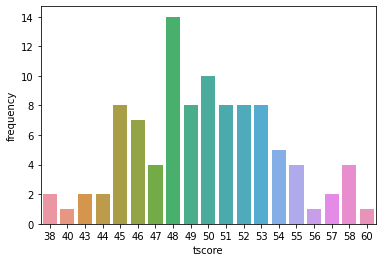

In [45]:
dataframe = test_score_distribution.DataFrame()
# !pip install matplotlib
%matplotlib inline
# quitar el comentario de la siguiente línea si aparece un mensaje de error diciendo que no sea ha encontrado seaborn
# !pip install seaborn

import seaborn

dataframe
plot = seaborn.barplot(x='tscore',y='frequency', data=dataframe)

¡Ahora sabes como trabajar con Db2 desde un cuaderno en JupyterLab utilizando SQL "magic"!


In [ ]:
%%sql 
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    


Copyright © 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201ES-edX-20127845&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201ES-edX-20127845&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201ES-edX-20127845&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201ES-edX-20127845&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).\n
